<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Сравнение-центра-города-с-общей-выборкой-(площадь,-число-комнат,-высота-потолков)" data-toc-modified-id="Сравнение-центра-города-с-общей-выборкой-(площадь,-число-комнат,-высота-потолков)-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Сравнение центра города с общей выборкой (площадь, число комнат, высота потолков)</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
data = pd.read_csv('/datasets/real_estate_data.csv',sep= '\t')
display(data.head(10))
print(data.info())
#посмотрели общую информацию по данным

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Описание данных

airports_nearest — расстояние до ближайшего аэропорта в метрах (м)

balcony — число балконов

ceiling_height — высота потолков (м)

cityCenters_nearest — расстояние до центра города (м)

days_exposition — сколько дней было размещено объявление (от публикации до снятия)

first_day_exposition — дата публикации

floor — этаж

floors_total — всего этажей в доме

is_apartment — апартаменты (булев тип)

kitchen_area — площадь кухни в квадратных метрах (м²)

last_price — цена на момент снятия с публикации

living_area — жилая площадь в квадратных метрах (м²)

locality_name — название населённого пункта

open_plan — свободная планировка (булев тип)

parks_around3000 — число парков в радиусе 3 км

parks_nearest — расстояние до ближайшего парка (м)

ponds_around3000 — число водоёмов в радиусе 3 км

ponds_nearest — расстояние до ближайшего водоёма (м)

rooms — число комнат

studio — квартира-студия (булев тип)

total_area — площадь квартиры в квадратных метрах (м²)

total_images — число фотографий квартиры в объявлении


### Вывод

1. Наблюдаем нулевые значения в столбцах :

ceiling_height

floors_total

living_area 

is_apartment 

kitchen_area

balcony

locality_name  

airports_nearest 

cityCenters_nearest 

parks_around3000 

parks_nearest    

ponds_around3000  

ponds_nearest   

days_exposition  

2. Также неверный тип данных в :

first_day_exposition - должен быть тип datatime

floors_total - кол-во этажей, тип данных - int

is_apartment - ответ да/нет, тип данных - bool

balcony - кол-во балконов, тип данных - int

parks_around3000,ponds_around3000 -  кол-во парков, водоёмов, тип данных - int

days_exposition - кол-во дней, тип данных - int

## Предобработка данных

In [2]:
print(data.columns)

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'cityCenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')


Все столбцы записаны по правилам.

In [3]:
data['is_apartment'] = data['is_apartment'].fillna(False)
# здесь возможен такой же вариант, как с балконами, человек просто не отмечает, что у него не апартаменты. 
#Также в Питере квартир преимущественно больше, чем апартаментов
data['floors_total'] = data['floors_total'].fillna(data['floors_total'].median())
# так как пропусков в данном столбце не так много можем заменить кол-во этажей на медианное значение
data['locality_name'].value_counts()
#оставим столбец без изменений, так как неизвестна причина отсутствия данных
data['ceiling_height'].value_counts()
data['floors_total'] = data['floors_total'].fillna(data['floors_total'].median())
# Заменим высоту потолков на медианное значение, так как высота не сильно варьируется.
data['living_area'].value_counts()
data['kitchen_area'].value_counts()
# Данные по площади я бы оставила неизменными, так как часто площадь играет очень важную роль при выборе квартиры.
data['airports_nearest'].value_counts()
data['airports_nearest'].describe()
data['cityCenters_nearest'].value_counts()
data['cityCenters_nearest'].describe()
# Эти столбцы также оставим без изменений, так как значения сильно варьируются 
data['parks_around3000'].value_counts()
data['ponds_around3000'].value_counts()

columns_int = ['parks_around3000','ponds_around3000','floors_total','balcony','days_exposition']
for x in columns_int:
    data[x] = data[x].fillna(0)
#cкорее всего человек не указал кол-во парков и водоёмов, так как рядом с квартирой их нет.
# возможно объявление только выставлено
#cкорее всего человек не указал кол-во балконов, так как в квартире их нет.

In [4]:
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format = '%Y-%m-%d')
# в датах в таблице нет времени

data['is_apartment'] = data['is_apartment'].astype('bool')
for x in columns_int:
    data[x] = data[x].astype('int64')

In [5]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  float64       
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        14504 non-null  float64       
 6   floors_total          23699 non-null  int64         
 7   living_area           21796 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          21421 non-null  float64       
 13  balcony         

Заполнены пропущенные значения там, где это не исказит данные.
Исправлены ошибки в типах данных, которые были выявлены в начале предобработки.

## Исследовательский анализ данных

In [6]:
data['price_for_square_meter'] = data['last_price'] / data['total_area']
# цена квадратного метра
data['day'] = data['first_day_exposition'].dt.weekday
data['month'] = data['first_day_exposition'].dt.month
data['year'] = data['first_day_exposition'].dt.year
# добавили столбцы с днем недели, месяцем и годом размещения объявления
def floor_name (x):
    floor = x['floor']
    floors_total  = x['floors_total']
    if floor == floors_total:
        return 'последний'
    elif floor == 1:
        return 'первый'
    else:
        return 'другой'
data['floor_name'] = data.apply(floor_name, axis =1)
#создали функцию которая будет определять категорию этажа квартиры
data['living_to_total'] = data['living_area']/data['total_area']
#соотношение жилой и общей площади
data['kitchen_to_total'] = data['kitchen_area']/data['total_area']
#отношение площади кухни к общей.
display(data.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_for_square_meter,day,month,year,floor_name,living_to_total,kitchen_to_total
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,2,755.0,0,120370.370370,3,3,2019,другой,0.472222,0.231481
1,7,3350000.0,40.40,2018-12-04,1,NaN,11,18.60,1,False,...,0,NaN,81,82920.792079,1,12,2018,первый,0.460396,0.272277
2,10,5196000.0,56.00,2015-08-20,2,NaN,5,34.30,4,False,...,2,574.0,558,92785.714286,3,8,2015,другой,0.612500,0.148214
3,0,64900000.0,159.00,2015-07-24,3,NaN,14,NaN,9,False,...,3,234.0,424,408176.100629,4,7,2015,другой,NaN,NaN
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,1,48.0,121,100000.000000,1,6,2018,другой,0.320000,0.410000
5,10,2890000.0,30.40,2018-09-10,1,NaN,12,14.40,5,False,...,0,NaN,55,95065.789474,0,9,2018,другой,0.473684,0.299342
6,6,3700000.0,37.30,2017-11-02,1,NaN,26,10.60,6,False,...,0,NaN,155,99195.710456,3,11,2017,другой,0.284182,0.386059
7,5,7915000.0,71.60,2019-04-18,2,NaN,24,NaN,22,False,...,0,NaN,0,110544.692737,3,4,2019,другой,NaN,0.263966
8,20,2900000.0,33.16,2018-05-23,1,NaN,27,15.43,26,False,...,0,NaN,189,87454.764777,2,5,2018,другой,0.465320,0.265682
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,0,NaN,289,88524.590164,6,2,2017,другой,0.714754,0.106557


Добавлены столбцы : 

с ценой квадратного метра;

с днем недели, месяцем и годом публикации объявления;

с категорией этажа квартиры; 

с соотношением жилой и общей площади, 

с соотношением площади кухни к общей.

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

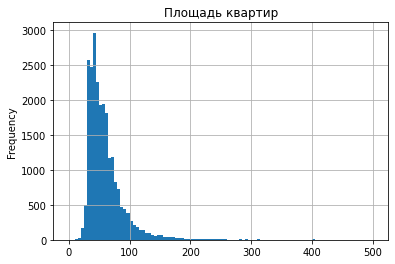

In [7]:
data['total_area'].plot(y='total_area',kind = 'hist', bins=100, grid=True, range = (0,500), title = ('Площадь квартир'))
data['total_area'].describe()

 Площадь квартир варьируется от 12 кв.м до 900 кв. м. Среднее значение - 60 кв. м.
 Медиана приближена к среднему значению.
 Исходя из данных, больше всего квартир в диапазоне 40 -70 кв.м.
 Аномальных выбросов нет, далее втречаются редкие кв с площадью больше 190 кв.м.

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

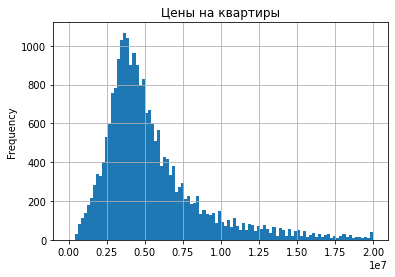

In [8]:
data['last_price'].plot(y ='last_price', bins = 100, kind = 'hist', grid=True, range =(0,20000000), title = ('Цены на квартиры'))
data['last_price'].describe()

Цены на квартиры варьируются от 1,2 миллионов рублей до 7,6 миллионов рублей.
Среднее значение - 6,5 млн руб, медиана - 4,6.
В основном квартиры стоят более 3,5 млн рублей.

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

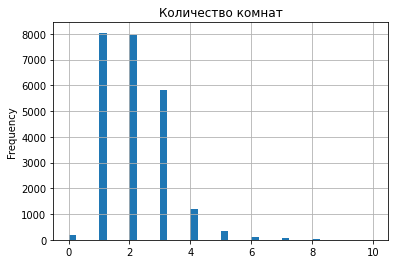

In [9]:
data['rooms'].plot(y ='rooms', bins = 40, kind = 'hist', grid=True, range =(0,10), title = ('Количество комнат'))
data['rooms'].describe()

Количество комнат колеблется от 0 до 19. Больше всего однокомнатных и двукомнатных квартир.

count    14504.000000
mean         2.771499
std          1.261056
min          1.000000
25%          2.520000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

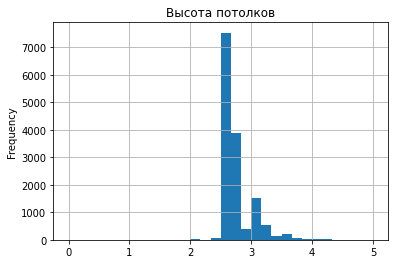

In [10]:
data['ceiling_height'].plot(y ='ceiling_height', bins = 30, kind = 'hist', grid=True, range =(0,5),title = ('Высота потолков'))
data['ceiling_height'].describe()

Средняя высота потолков в квартирах 2,7 м.

count    23699.000000
mean       156.608844
std        213.546873
min          0.000000
25%         22.000000
50%         74.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64

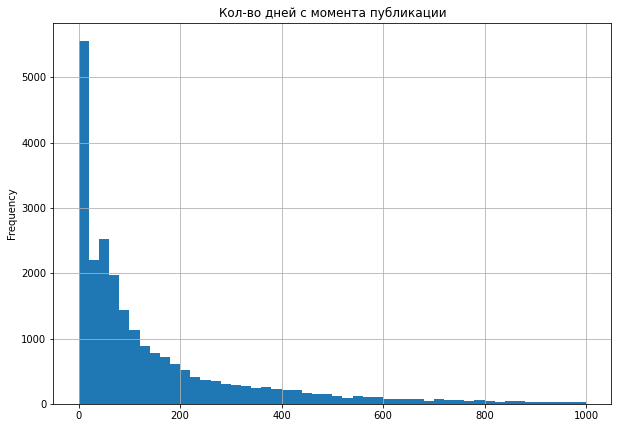

In [11]:
data['days_exposition'].plot(y ='days_exposition', bins = 50, kind = 'hist', grid=True, range =(0,1000),title = ('Кол-во дней с момента публикации'),figsize=(10,7))
data['days_exposition'].describe()
# Можем заметить что в основном квартиры снимаются с публикации в первые 200 дней
#Рассмотрим этот период времени

count    23699.000000
mean       156.608844
std        213.546873
min          0.000000
25%         22.000000
50%         74.000000
75%        199.000000
max       1580.000000
Name: days_exposition, dtype: float64


0       3181
45       880
60       538
7        234
30       208
        ... 
1112       1
1080       1
1064       1
1032       1
1391       1
Name: days_exposition, Length: 1142, dtype: int64

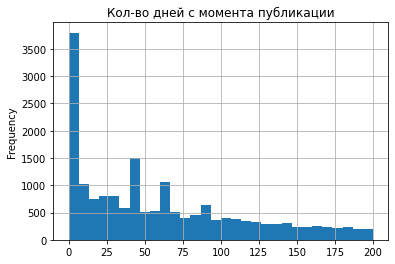

In [12]:
data['days_exposition'].plot(y ='days_exposition', bins = 30, kind = 'hist', grid=True, range =(0,200),title = ('Кол-во дней с момента публикации'))
print(data['days_exposition'].describe())
data['days_exposition'].value_counts()

Вывод :

Исходя из данных средний период снятия публикации - 157 дней. Медиана - 74 дня. 
На гистограмме особо выделяются 45 дней, 60 дней и 90 дней.
Также методом value_counts() определили выбросы в значениях 7 дней и 30 дней.
Предположим, что данные являются аномальными, также как и значение в 0 дней.
На первой гистограмме видно, что после 600 дней значения маленькие, можно считать это число ограничением по времени.
Можно сделать вывод, что квартиры продаются от 1 дня до 600 дней в среднем, если значение больше 600, то оно необычно долгими.

count    18454.000000
mean       195.803349
std        226.760010
min          1.000000
25%         44.000000
50%        114.000000
75%        259.000000
max       1580.000000
Name: days_exposition, dtype: float64

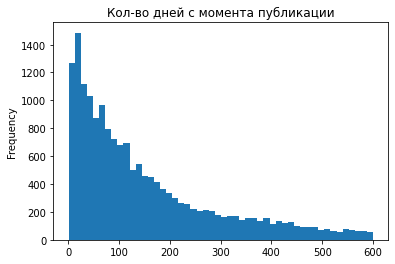

In [13]:
new_data = data.query('days_exposition != 0 and days_exposition != 7 and days_exposition != 30 and days_exposition != 45 and days_exposition != 60 and days_exposition != 90')
new_data['days_exposition'].plot(y = 'days_exposition', kind = 'hist', bins = 50, range =(1,600), title = ('Кол-во дней с момента публикации'))
new_data['days_exposition'].describe()

Значение медианы и среднего значения увеличились в большую сторону. Медиана стала 114 дней, среднее значение - 196 дней. На гистограмме нет аномальных выбросов.

# Зависимость цены от площади, кол-ва комнат, удаленности от центра, этажа, даты публикации.

0.6536750579657242

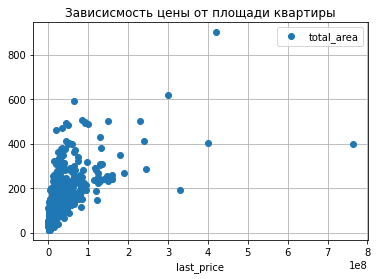

In [14]:
new_data.plot(x = 'last_price', y = 'total_area', style = 'o', grid = True,title = ('Зависисмость цены от площади квартиры'))
data['last_price'].corr(data['total_area'])

Коэффициент корреляции 0,65, достаточно весомый. Можно сделать вывод, что чем больше площадь квартиры, тем больше ее стоимость.

0.3633428499648948

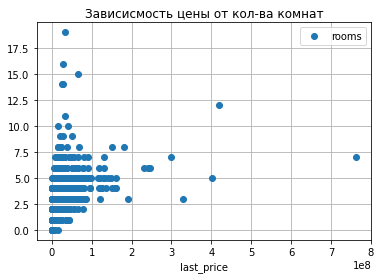

In [15]:
new_data.plot(x = 'last_price', y = 'rooms', style = 'o', grid = True,title = ('Зависисмость цены от кол-ва комнат'))
data['rooms'].corr(data['last_price'])

Коэффициент корреляции 0,36. Можно сделать вывод, что кол-во комнат влияет на стоимость квартиры.

-0.20674734874298373

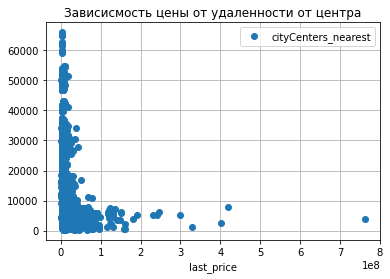

In [16]:
new_data.plot(x = 'last_price', y = 'cityCenters_nearest', style = 'o', grid = True,title = ('Зависисмость цены от удаленности от центра'))
data['cityCenters_nearest'].corr(data['last_price'])

Коэффициент корреляции -0.2. По графику можно сделать вывод, что удаленность от центра влияет на стоимость квартиры.Чем ближе - тем выше цена.

<AxesSubplot:title={'center':'Зависисмость цены от этажа'}, xlabel='floor_name'>

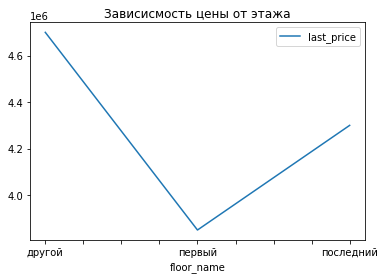

In [17]:
pivot_table_floor = new_data.pivot_table(index = 'floor_name', values = 'last_price', aggfunc = 'median')
pivot_table_floor.plot(title = 'Зависисмость цены от этажа')

Исходя из графика можно сделать вывод, что квартиры на первом и последнем этаже дешевле других.

<AxesSubplot:title={'center':'Зависисмость цены от дня недели'}, xlabel='day'>

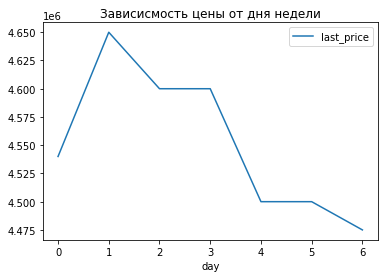

In [18]:
pivot_table_day = new_data.pivot_table(index = 'day', values = 'last_price', aggfunc = 'median')
pivot_table_day.plot(title = 'Зависисмость цены от дня недели')

Зависимость между днем недели и ценой не видна, единственное, можно сказать, что во вторник выставляют некоторые объявления дороже, а к выходным цена в объявлениях падает.

<AxesSubplot:title={'center':'Зависисмость цены от месяца'}, xlabel='month'>

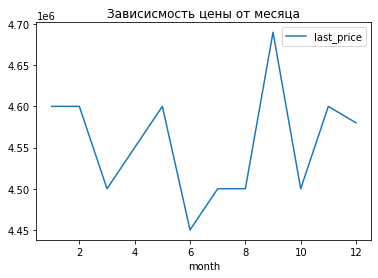

In [19]:
pivot_table_month = new_data.pivot_table(index = 'month', values = 'last_price', aggfunc = 'median')
pivot_table_month.plot(title = 'Зависисмость цены от месяца')

Пик стоимостей в период август-сентябрь. Самая низкая стоимость в июне. В период летнего сезона мы видим провал на графике. Возможно, много людей выезжает куда-то летом и не занимаются поиском квартиры. 

<AxesSubplot:title={'center':'Зависисмость цены от года'}, xlabel='year'>

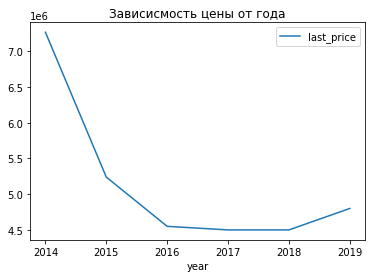

In [20]:
pivot_table_year = new_data.pivot_table(index = 'year', values = 'last_price', aggfunc = 'median')
pivot_table_year.plot(title = 'Зависисмость цены от года')

В период с 2014 по 2016 цена на квартиры упала. С 2018 года цена начинает повышаться.
Возможно, падение цен на квартиры связано с кризисом в 2014-15 году.

In [21]:
def agg_plot_dyn_price(df, index, title):
    pivot_table_year = df.pivot_table(index = index, values = 'last_price', aggfunc = 'median')
    pivot_table_year.plot(title = title)

# Населённые пункты с самой высокой и низкой стоимостью жилья

,count,mean
locality_name,,
Санкт-Петербург,12414,112342.026764
посёлок Мурино,470,85660.937666
посёлок Шушары,359,78209.189630
Всеволожск,305,68612.109173
Пушкин,283,102690.649073
Колпино,273,75145.099754
деревня Кудрово,265,92234.338086
посёлок Парголово,261,89777.774558
Гатчина,241,67323.267175


Средняя стоимость квадртаного метра в топ-10 населенных пунктов по кол-ву объявлений: 46953.011478045235


<AxesSubplot:title={'center':'Средняя стоимость квадртаного метра в топ-10 населенных пунктов'}, ylabel='Frequency'>

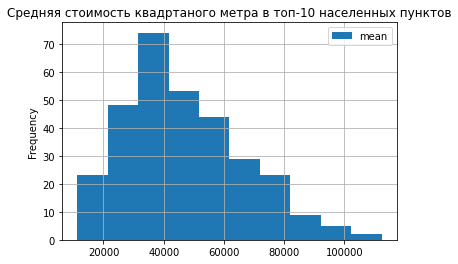

In [22]:
locality_pivot_table = new_data.pivot_table(index = 'locality_name', values = 'price_for_square_meter', aggfunc = ['count','mean'])
locality_pivot_table.columns = ['count', 'mean']
display(locality_pivot_table.sort_values('count', ascending = False).head(10))
print('Средняя стоимость квадртаного метра в топ-10 населенных пунктов по кол-ву объявлений:', locality_pivot_table['mean'].mean())
locality_pivot_table.plot(y = 'mean', kind = 'hist', bins = 10, grid = True,title = ('Средняя стоимость квадртаного метра в топ-10 населенных пунктов'))

Средняя стоимость квадртаного метра в топ-10 населенных пунктов по кол-ву объявлений: 46953. Населенный пункт с самой высокой стоимостью жилья - Санкт-Петербург, населенный пункт с самой низкой стоимостью жилья - Выборг.

# Какая область входит в центр?

Средняя цена за каждый км: 662137.5977664766


/tmp/ipykernel_72/2329787044.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_spb['center_km'] = round(new_data['cityCenters_nearest']/1000)


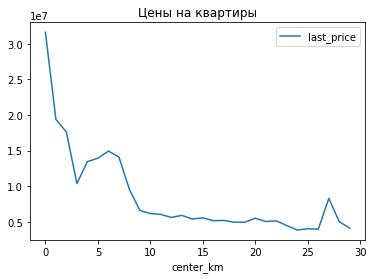

In [23]:
data_spb = new_data.query('locality_name == "Санкт-Петербург"')
data_spb['center_km'] = round(new_data['cityCenters_nearest']/1000)
mean_km = data_spb['last_price'].mean() / data_spb['center_km'].mean()
print('Средняя цена за каждый км:' ,mean_km)
data_spb.pivot_table(index = 'center_km', values = 'last_price', aggfunc = 'mean').plot(title = ('Цены на квартиры'))

import warnings

warnings.simplefilter('ignore')


Исходя из графика можно сделать вывод, что цена зависит от расстояния до центра, чем ближе тем выше цена. Особое падение цены по сравнения с кв в самом центре происходит после 10 км.
Предположим, что 10 км и есть центральная зона.

# Площадь, число комнат, высота потолков в центре

In [24]:
center_data = data_spb.query('center_km <= 10')
center_data

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_for_square_meter,day,month,year,floor_name,living_to_total,kitchen_to_total,center_km
3,0,64900000.0,159.00,2015-07-24,3,NaN,14,NaN,9,False,...,234.0,424,408176.100629,4,7,2015,другой,NaN,NaN,7.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.0,13,False,...,48.0,121,100000.000000,1,6,2018,другой,0.320000,0.410000,8.0
21,13,3200000.0,31.60,2018-03-14,1,NaN,5,16.9,2,False,...,NaN,310,101265.822785,2,3,2018,другой,0.534810,0.180380,10.0
24,8,6500000.0,97.20,2015-10-31,2,NaN,3,46.5,1,False,...,124.0,265,66872.427984,5,10,2015,первый,0.478395,0.201646,2.0
35,6,15500000.0,149.00,2017-06-26,5,NaN,5,104.0,4,False,...,779.0,644,104026.845638,0,6,2017,другой,0.697987,0.114094,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23668,13,6000000.0,47.00,2018-03-16,2,3.00,5,27.0,4,False,...,NaN,157,127659.574468,4,3,2018,другой,0.574468,0.191489,9.0
23681,13,5250000.0,43.00,2018-05-11,2,2.50,5,29.0,2,False,...,660.0,80,122093.023256,4,5,2018,другой,0.674419,0.139535,7.0
23690,3,5500000.0,52.00,2018-07-19,2,NaN,5,31.0,2,False,...,NaN,15,105769.230769,3,7,2018,другой,0.596154,0.115385,6.0
23691,11,9470000.0,72.90,2016-10-13,2,2.75,25,40.3,7,False,...,806.0,519,129903.978052,3,10,2016,другой,0.552812,0.145405,4.0


count    4212.000000
mean       80.293094
std        53.948819
min        12.000000
25%        46.400000
50%        67.700000
75%        95.000000
max       900.000000
Name: total_area, dtype: float64

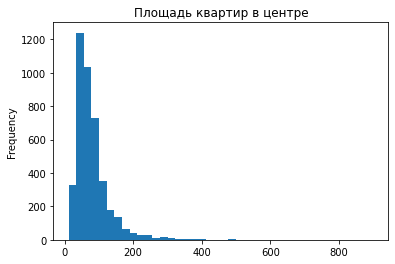

In [25]:
center_data['total_area'].plot(kind ='hist',bins=40,title = ('Площадь квартир в центре'))
center_data['total_area'].describe()

Средняя плошадь квартир в центре - 80, медиана - 68. Данные отличаются от общей выборки (Среднее значение - 60 кв. м.). Плошадь квартир в центре в среднем больше.

count    4212.000000
mean        2.533713
std         1.356113
min         0.000000
25%         2.000000
50%         2.000000
75%         3.000000
max        19.000000
Name: rooms, dtype: float64

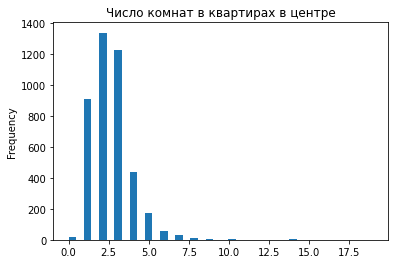

In [26]:
center_data['rooms'].plot(kind ='hist',bins=40,title = ('Число комнат в квартирах в центре'))
center_data['rooms'].describe()

В центре больше двухкомнатных квартир. Однокомнатных меньше, чем в общей выборке. 

count    2669.000000
mean        3.032057
std         2.070772
min         2.400000
25%         2.700000
50%         3.000000
75%         3.200000
max       100.000000
Name: ceiling_height, dtype: float64

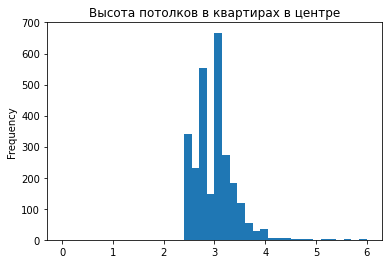

In [27]:
center_data['ceiling_height'].plot(kind ='hist',bins=40,title = ('Высота потолков в квартирах в центре'), range = (0,6))
center_data['ceiling_height'].describe()

В квартирах в центре средняя высота потолков - 3 метра, в общей выборке средняя высота - 2,7 м.

# Зависимость цены квартиры в центре от числа комнат, этажа, удалённости от центра, даты размещения объявления

0.3624812852494068

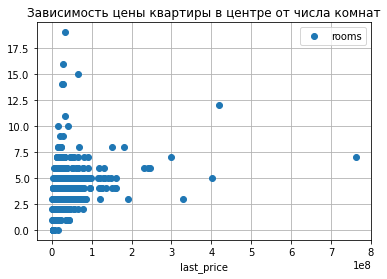

In [28]:
center_data.plot(x = 'last_price', y = 'rooms', style = 'o', grid = True,title = ('Зависимость цены квартиры в центре от числа комнат'))

center_data['rooms'].corr(center_data['last_price'])

Зависимость такая же как в общей выборке : цена поднимается в зависимости от кол-ва комнат, разница между однокомнатной и пятикомнатной существенная.

<AxesSubplot:title={'center':'Зависимость цены квартиры в центре от этажа'}, xlabel='floor_name'>

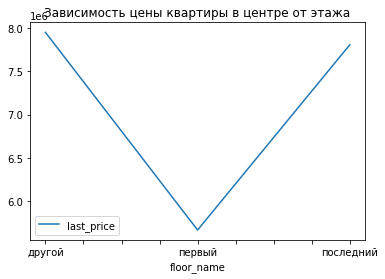

In [29]:
pivot_table_new_floor = center_data.pivot_table(index = 'floor_name', values = 'last_price', aggfunc = 'median')
pivot_table_new_floor.plot(title = ('Зависимость цены квартиры в центре от этажа'))

В отличие от общей выборки здесь последний этаж не уступает в цене квартирам на других этажах, однако на первом этаже квартиры также дешевле.

-0.1535473560705494

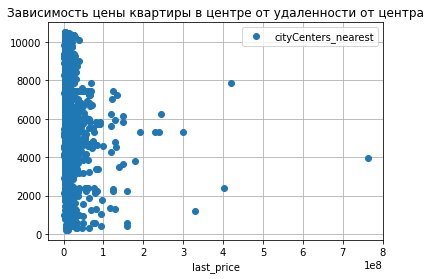

In [30]:
center_data.plot(x = 'last_price', y = 'cityCenters_nearest', style = 'o', grid = True, title = ('Зависимость цены квартиры в центре от удаленности от центра'))
center_data['cityCenters_nearest'].corr(center_data['last_price'])

Четкой зависимости нет, так как это все центр города.

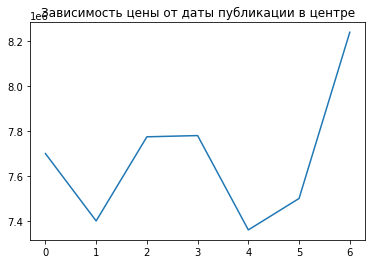

AxesSubplot(0.125,0.125;0.775x0.755)


<AxesSubplot:title={'center':'Зависимость цены квартиры в центре от года публикации'}, xlabel='year'>

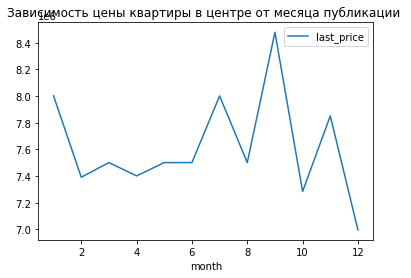

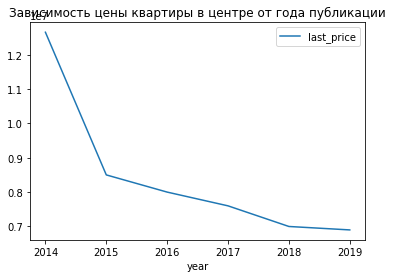

In [31]:
pivot_table_new_day = center_data.pivot_table(index = 'day', values = 'last_price', aggfunc = 'median')
plt.plot(pivot_table_new_day)
plt.title('Зависимость цены от даты публикации в центре')
plt.show()


pivot_table_new_month = center_data.pivot_table(index = 'month', values = 'last_price', aggfunc = 'median')
print(pivot_table_new_month.plot(title = ('Зависимость цены квартиры в центре от месяца публикации ')))

pivot_table_new_year = center_data.pivot_table(index = 'year', values = 'last_price', aggfunc = 'median')
pivot_table_new_year.plot(title = ('Зависимость цены квартиры в центре от года публикации'))

По сравнению с общей выборкой, в центре объявления, выставленные во вторник и пятницу, дешевле, а к выходным цена наоборот повышается.
По месяцам - самые дорогие объявления выставлют также как и в общей выборке в августе-сентябре. Однако самая низкая стоимость в декабре, в летний сезон также наблюдается спад, но не такой как в общей выборке.
По годам - Резкий спад, также как и в общей выборке, наблюдается в период 2014-2015 годов, но так и продолжает падать. 

## Сравнение центра города с общей выборкой (площадь, число комнат, высота потолков)

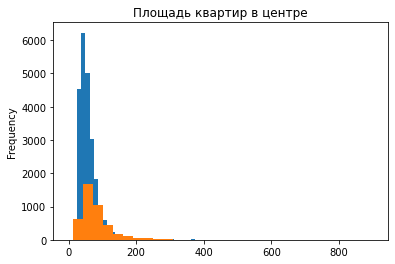

In [32]:
data['total_area'].plot(y='total_area',kind = 'hist', bins=40, grid=True, range = (0,500), title = ('Площадь квартир'))
center_data['total_area'].plot(kind ='hist',bins=30,title = ('Площадь квартир в центре'))
plt.show()


Можно заметить, что  гафик по площади квартир в центре смещен вправо, в центре находятся квартиры с большей площадью.

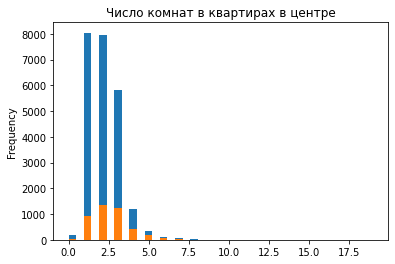

In [33]:
data['rooms'].plot(kind ='hist',bins=40,title = ('Число комнат в квартирах в центре'))
center_data['rooms'].plot(kind ='hist',bins=40,title = ('Число комнат в квартирах в центре'))
plt.show()

В центре большое кол-во 3-х комнатных квартир из общей выборки.

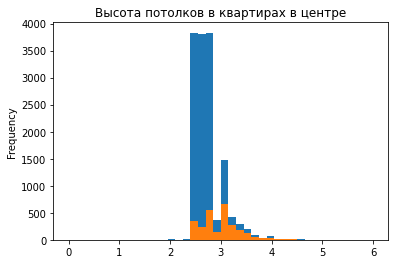

In [34]:
data['ceiling_height'].plot(kind ='hist',bins=40,title = ('Высота потолков в квартирах в центре'), range = (0,6))
center_data['ceiling_height'].plot(kind ='hist',bins=40,title = ('Высота потолков в квартирах в центре'), range = (0,6))
plt.show()

Высота потолков в центре в среднем - 3 м, основная часть квартир из общей выборки с такими потолками находится в центре.

## Общий вывод

1) После получения и предобработки данных мы с помощью графиков выявили аномальные значения и отбросили их, далее проанализировали общий рынок квартир в Питере.
Выводы по общей выборке : 
    
Площадь квартир варьируется от 12 кв.м до 900 кв. м. Среднее значение - 60 кв. м

Больше всего однокомнатных и двухкомнатных квартир.

Средняя высота потолков в квартирах 2,7 м.

Среднее значение продажи кв- 196 дней.

Чем больше площадь квартиры, тем больше ее стоимость.

Кол-во комнат влияет на стоимость квартиры. Чем бюольше комнат -  тем больше стоимость.

Чем ближе к центру - тем выше цена.

Квартиры на первом и последнем этаже дешевле других.

Пик стоимости квартир в период август-сентябрь. Самая низкая стоимость в июне.

Во вторник выставляют некоторые объявления дороже, а к выходным цена в объявлениях падает.

В период с 2014 по 2016 цена на квартиры упала. С 2018 года цена начинает повышаться.

2) Далее мы рассмотрели топ-10 населенных пунктов :

Средняя стоимость квадртаного метра в топ-10 населенных пунктов по кол-ву объявлений: 46953. 

Населенный пункт с самой высокой стоимостью жилья - Санкт-Петербург, населенный пункт с самой низкой стоимостью жилья - Выборг.

3) Далее мы проанализировали центр города и сделали вывод, что радиус центра Питера - 10 км.

4) Исходя из вывода по центру города, мы сравнили показатели общей выборки и выборки по центру :

Зависимость комнат от цены такая же как в общей выборке : цена поднимается в зависимости от кол-ва комнат.

В отличие от общей выборки здесь последний этаж не уступает в цене квартирам на других этажах, однако на первом этаже квартиры также дешевле.

По сравнению с общей выборкой, в центре объявления, выставленные во вторник и пятницу, дешевле, а к выходным цена наоборот повышается.
По месяцам - самые дорогие объявления выставляют также как и в общей выборке в августе-сентябре. Однако самая низкая стоимость в декабре, в летний сезон также наблюдается спад, но не такой как в общей выборке.
По годам - Резкий спад, также как и в общей выборке, наблюдается в период 2014-2015 годов, но так и продолжает падать.

    
